# Problemas de regresión

## 1. Diabetes

#### Importamos las librerías a utilizar

In [14]:
import numpy as np
from sklearn.metrics import r2_score
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

#### Carga y preprcesamiento de los datos

In [15]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize the data
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Inicialización y entrenamiento del modelo

In [16]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(10, 5, optimizer='adam'),
    ReLU(),
    DenseLayer(5, 1, optimizer='adam')
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10)

Epoch 0, Loss Train(MSE): 27702.788990024015, R2 Train: -3.4862924256137973
,Loss Valid(MSE): 32814.09098119074, R2 Valid: -5.1035003152256735
Epoch 1, Loss Train(MSE): 26400.195950052024, R2 Train: -3.275345676137129
,Loss Valid(MSE): 31361.57750935947, R2 Valid: -4.833329295151602
Epoch 2, Loss Train(MSE): 24222.845497605944, R2 Train: -2.922737465958968
,Loss Valid(MSE): 28836.71527301209, R2 Valid: -4.363698810361362
Epoch 3, Loss Train(MSE): 20627.552567856317, R2 Train: -2.340502390479494
,Loss Valid(MSE): 24649.18461475558, R2 Valid: -3.5848079763188725
Epoch 4, Loss Train(MSE): 15541.298773799323, R2 Train: -1.5168155812111412
,Loss Valid(MSE): 18654.684577698783, R2 Valid: -2.4698164659104744
Epoch 5, Loss Train(MSE): 10412.9879297621, R2 Train: -0.6863178972385158
,Loss Valid(MSE): 12433.137311775046, R2 Valid: -1.3125936215987588
Epoch 6, Loss Train(MSE): 7386.530921784556, R2 Train: -0.1962022212961103
,Loss Valid(MSE): 8561.443260475366, R2 Valid: -0.5924491606075846
Epoch

#### Análisis y visualizacion de resultados

MSE:2852.1973046332055 
 R2:0.46166183227353286


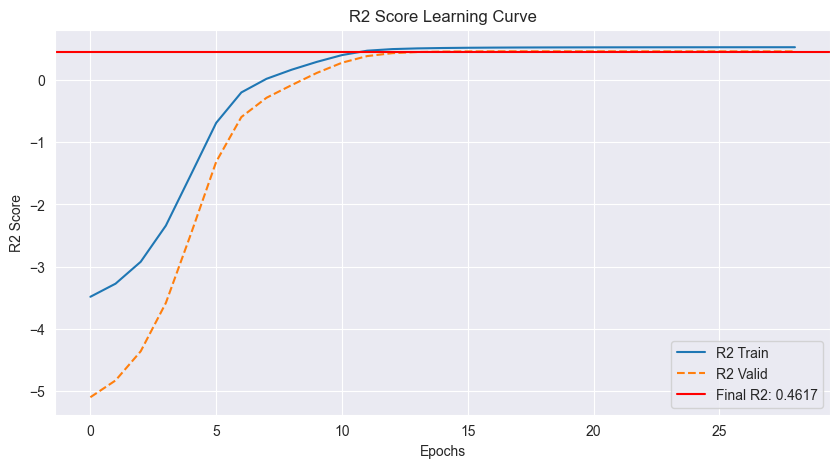

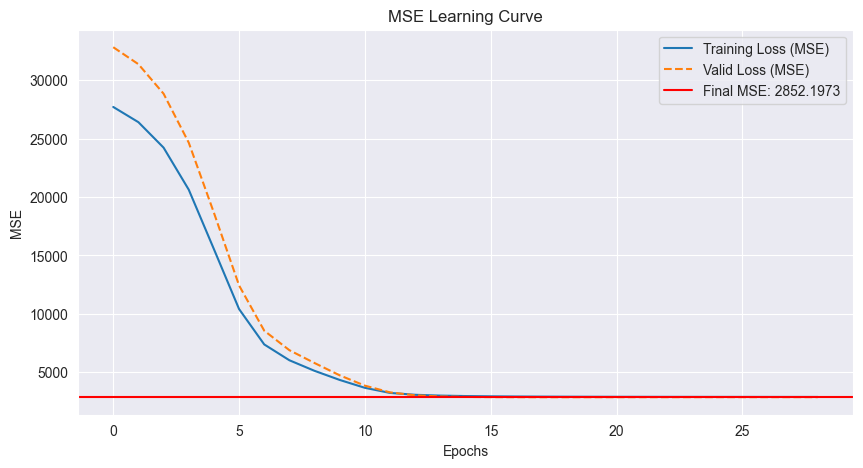

In [17]:
# Calculate MSE and R2
predicted = network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.axhline(y=r2, color='r', linestyle='-', label=f'Final R2: {r2:.4f}')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.axhline(y=mse, color='r', linestyle='-', label=f'Final MSE: {mse:.4f}')
plt.legend()
plt.show()

### Probar los distintos optimizers

Training with sgd_momentum
Epoch 0, Loss Train(MSE): 28413.557562075326, R2 Train: -3.6013969251032316
,Loss Valid(MSE): 33863.249079547655, R2 Valid: -5.298646259927098
Epoch 1, Loss Train(MSE): 27975.803799241512, R2 Train: -3.5305054566957548
,Loss Valid(MSE): 33321.53886844146, R2 Valid: -5.1978868500094855
Epoch 2, Loss Train(MSE): 27329.00131808691, R2 Train: -3.425759863278534
,Loss Valid(MSE): 32554.699057689017, R2 Valid: -5.055252789863252
Epoch 3, Loss Train(MSE): 25875.12474926471, R2 Train: -3.1903136978822193
,Loss Valid(MSE): 30935.221362087428, R2 Valid: -4.754026020202893
Epoch 4, Loss Train(MSE): 22221.472440267808, R2 Train: -2.5986276880157826
,Loss Valid(MSE): 27000.129022154364, R2 Valid: -4.022089324135622
Epoch 5, Loss Train(MSE): 14485.647264654179, R2 Train: -1.3458594593827184
,Loss Valid(MSE): 18329.397609952084, R2 Valid: -2.4093123028873746
Epoch 6, Loss Train(MSE): 9223.940301210492, R2 Train: -0.4937591129375529
,Loss Valid(MSE): 11250.343841883616, R2 V

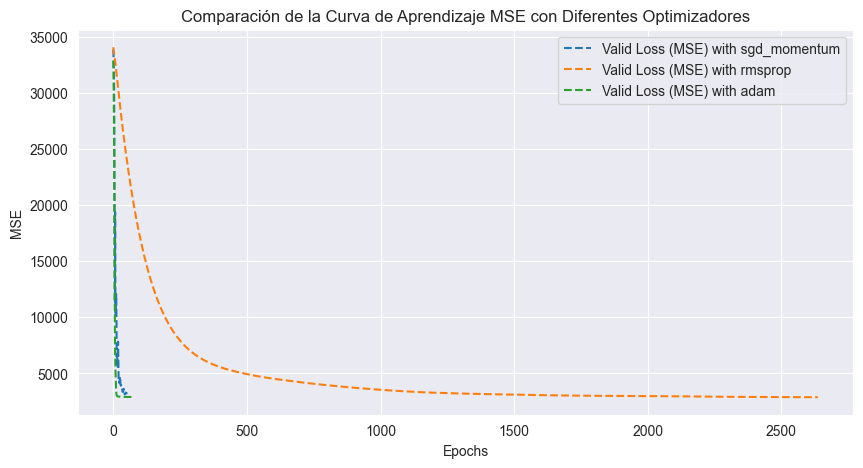

In [18]:
# Lista de optimizadores a probar
optimizers = ["sgd_momentum", "rmsprop", "adam"]

# Diccionario para almacenar las métricas de cada optimizador
optimizer_metrics = {}

for optimizer in optimizers:
    print(f"Training with {optimizer}")
    
    # Crear una nueva instancia de la red neuronal con el optimizador actual
    network = NeuralNetwork(
        DenseLayer(10, 5, optimizer=optimizer),
        ReLU(),
        DenseLayer(5, 1, optimizer=optimizer)
    )
    
    # Entrenar la red neuronal
    metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse', patience=10)
    
    # Almacenar las métricas para este optimizador
    optimizer_metrics[optimizer] = metrics

# Plot de la curva de aprendizaje de MSE para cada optimizador
plt.figure(figsize=(10, 5))

for optimizer, metrics in optimizer_metrics.items():
    plt.plot(metrics["loss_history_valid"], label=f'Valid Loss (MSE) with {optimizer}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Comparación de la Curva de Aprendizaje MSE con Diferentes Optimizadores')
plt.legend()
plt.show()

## 2. Desempeño estudiante

#### Importamos las librerías a utilizar

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import Sigmoid, Softmax, ReLU
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.LossFunctions import CrossEntropy

#### Carga y preprocesamiento de los datos

In [20]:

# Carga de datos
df = pd.read_csv('Student_Performance.csv')

# Preprocesamiento
X = df.drop('Performance Index', axis=1)
y = df['Performance Index'].values

# ColumnTransformer para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']),
        ('cat', OneHotEncoder(), ['Extracurricular Activities'])
    ])

# Dividir en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)
n_input_features = X_train.shape[1]  # Número de características de entrada después del preprocesamiento

#### Inicialización y entrenamiento del modelo

In [23]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(n_input_features, 5, optimizer='adam'),
    ReLU(),
    DenseLayer(5, 1, optimizer='adam')
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10,min_delta=0.05)

Epoch 0, Loss Train(MSE): 3318.7343940191263, R2 Train: -8.009395870272835
,Loss Valid(MSE): 3310.487297756666, R2 Valid: -7.949593489430736
Epoch 1, Loss Train(MSE): 3258.6468145764543, R2 Train: -7.846275618450001
,Loss Valid(MSE): 3250.553222933763, R2 Valid: -7.787567310930191
Epoch 2, Loss Train(MSE): 3192.616843654639, R2 Train: -7.667023507039904
,Loss Valid(MSE): 3184.6873519792534, R2 Valid: -7.609505075116866
Epoch 3, Loss Train(MSE): 3118.079390340883, R2 Train: -7.4646760624008195
,Loss Valid(MSE): 3110.2743092121, R2 Valid: -7.408336357892384
Epoch 4, Loss Train(MSE): 3031.9172477152256, R2 Train: -7.2307709769729485
,Loss Valid(MSE): 3024.264329279442, R2 Valid: -7.175816403215922
Epoch 5, Loss Train(MSE): 2930.312134321247, R2 Train: -6.954942730319644
,Loss Valid(MSE): 2922.715592253994, R2 Valid: -6.90128886874729
Epoch 6, Loss Train(MSE): 2808.2046847019974, R2 Train: -6.62345662094259
,Loss Valid(MSE): 2800.4719789191404, R2 Valid: -6.570814667330642
Epoch 7, Loss Tr

#### Análisis y visualización de resultados

MSE:4.369368541972361 
 R2:0.9882095412003208


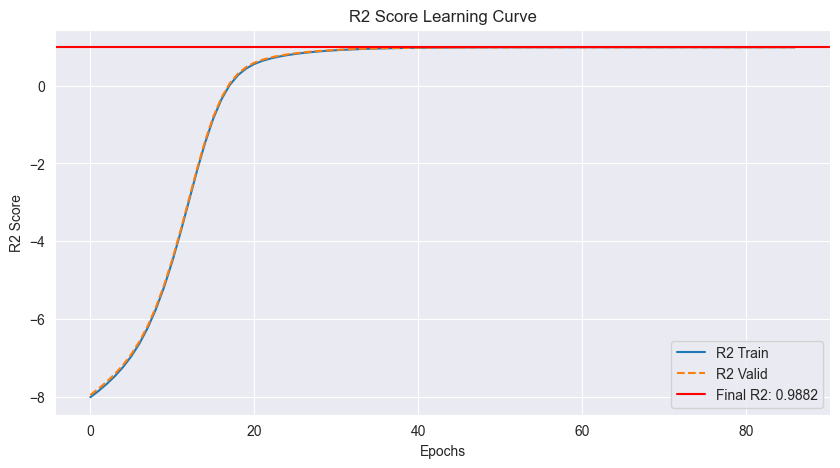

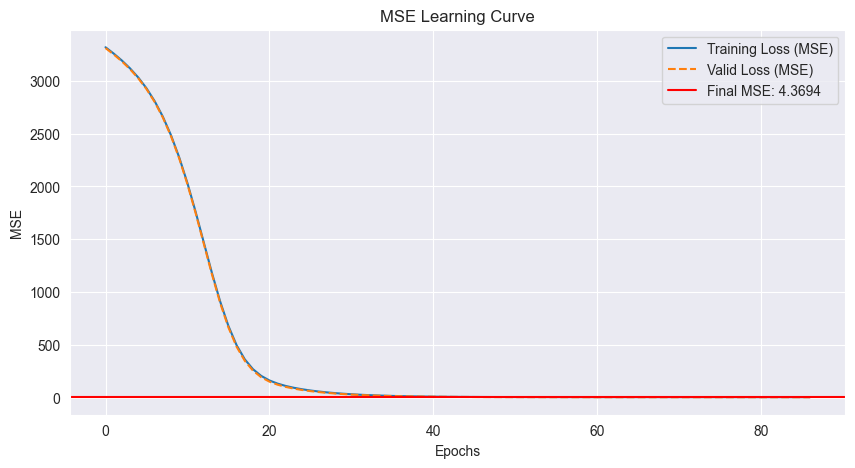

In [24]:
# Calculate MSE and R2
predicted = network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.axhline(y=r2, color='r', linestyle='-', label=f'Final R2: {r2:.4f}')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.axhline(y=mse, color='r', linestyle='-', label=f'Final MSE: {mse:.4f}')
plt.legend()
plt.show()